In [2]:
## Data Preperation Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
## Support Vector Machine Libraries
from sklearn import svm
## Decision Tree Libraries
from sklearn import tree
## Adaboost Libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
## Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
## Library for plotting
# import matplotlib.pyplot as plt
## Library for calculating performance metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score,roc_curve, auc
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import warnings
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
import os
import time
#Setting options
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

#Set Default option
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_rows = 3000

In [3]:
sc = StandardScaler()

In [4]:
data = pd.read_csv('C:\\Users\\14692\\Documents\\Sem-II\ML\\creditcardfraud\\creditcard.csv')

In [5]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
# data=data.sample(2000)

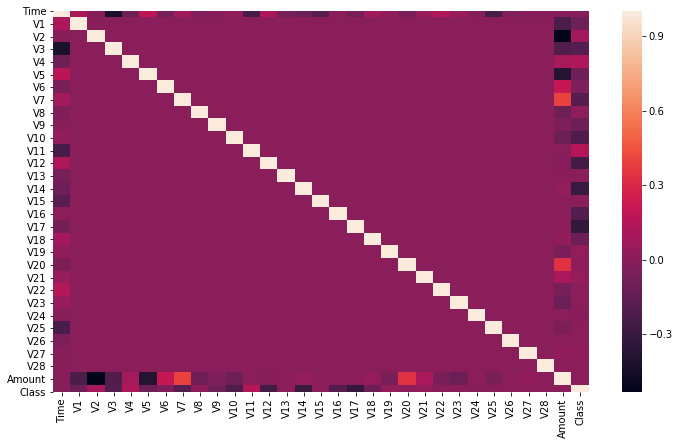

In [7]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr())

In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
credit_df=data

In [10]:
df1=credit_df[credit_df['Class']==0].sample(9000)
df2=credit_df[credit_df['Class']==1]
frame=[df1,df2]
data=pd.concat(frame)

In [11]:
data['Class'].value_counts()

0    9000
1     492
Name: Class, dtype: int64

In [12]:
#Independent Variables
X = data.drop('Class', axis=1)
y=data['Class']

In [13]:
from sklearn.model_selection import train_test_split 

In [14]:
#Splitting data into train and test set with 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [15]:
#Scaling the independent features
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [16]:
print("Before OverSampling, counts of label '1':",(y_train == 1).sum()) 
print("Before OverSampling, counts of label '0':",(y_train == 0).sum())
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
#conda install -c conda-forge imbalanced-learn

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X:',X_train_res.shape) 
print('After OverSampling, the shape of train_y:', y_train_res.shape) 
  
print("After OverSampling, counts of label '1':",sum(y_train_res == 1)) 
print("After OverSampling, counts of label '0':",sum(y_train_res == 0)) 

Before OverSampling, counts of label '1': 398
Before OverSampling, counts of label '0': 7195
After OverSampling, the shape of train_X: (14390, 30)
After OverSampling, the shape of train_y: (14390,)
After OverSampling, counts of label '1': 7195
After OverSampling, counts of label '0': 7195


In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
def validation(clf,X_train, y_train):
    scores = cross_validate(clf, X_train, y_train,cv=8, return_train_score=True)
    return scores

In [19]:
def roc_auc(yTest,y_pred):
#     sns.set()
    fpr, tpr, thresholds = roc_curve(yTest, y_pred)
    roc_auc = auc(fpr,tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## Linear Kernel

In [20]:
model_linear = SVC(kernel='linear', C=0.01)
score_1_linear = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='linear', C=0.1)
score_2_linear = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='linear', C=0.5)
score_3_linear = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='linear', C=1)
score_4_linear = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='linear', C=5)
score_5_linear = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='linear', C=10)
score_6_linear = validation(model_linear, X_train, y_train)



In [21]:
score_1_linear=pd.DataFrame.from_dict(score_1_linear)
score_2_linear=pd.DataFrame.from_dict(score_2_linear)
score_3_linear=pd.DataFrame.from_dict(score_3_linear)
score_4_linear=pd.DataFrame.from_dict(score_4_linear)
score_5_linear=pd.DataFrame.from_dict(score_5_linear)
score_6_linear=pd.DataFrame.from_dict(score_6_linear)

In [22]:
score_5_linear['test_score'].mean()

0.9890691032111363

In [23]:
s1_linear_train=[score_1_linear[['train_score']].mean(axis=0),score_2_linear[['train_score']].mean(axis=0),
                score_3_linear[['train_score']].mean(axis=0),score_4_linear[['train_score']].mean(axis=0),
                score_5_linear[['train_score']].mean(axis=0),score_6_linear[['train_score']].mean(axis=0)]  

s1_linear_test=[score_1_linear[['test_score']].mean(axis=0),score_2_linear[['test_score']].mean(axis=0),
                score_3_linear[['test_score']].mean(axis=0),score_4_linear[['test_score']].mean(axis=0),
                score_5_linear[['test_score']].mean(axis=0),score_6_linear[['test_score']].mean(axis=0)]  

In [24]:
## Learning curve for Train and Test accuracy for Linear SVM function for various values of C
def train_cv_plot(c,s1_linear_train,s1_linear_test):
    plt.plot(c,s1_linear_train,label='train',marker='o',markersize=4)
    plt.plot(c,s1_linear_test,label='cv',c='r',marker='o',markersize=4)
#     plot.set_xlabel("C(Regularization Parameter)", fontsize = 12)
    plt.xlabel("C(Regularization Parameter)")
    plt.ylabel("Accuracy")
#     plot1.set_title('Accuracy', fontsize = 16)
    plt.legend(loc='best')
    plt.title("Train and CrossValidation accuracy for SVM Linear kernel as a function of C")

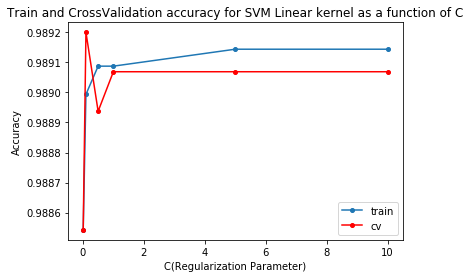

In [25]:
c=[0.01,0.1,0.5,1,5,10]
train_cv_plot(c,s1_linear_train,s1_linear_test)

## Rbf Kernel

In [26]:
model_linear = SVC(kernel='rbf', C=0.01)
score_1_rbf = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='rbf', C=0.1)
score_2_rbf = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='rbf', C=0.5)
score_3_rbf = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='rbf', C=1)
score_4_rbf = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='rbf', C=5)
score_5_rbf = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='rbf', C=50)
score_6_rbf = validation(model_linear, X_train, y_train)

In [27]:
score_1_rbf=pd.DataFrame.from_dict(score_1_rbf)
score_2_rbf=pd.DataFrame.from_dict(score_2_rbf)
score_3_rbf=pd.DataFrame.from_dict(score_3_rbf)
score_4_rbf=pd.DataFrame.from_dict(score_4_rbf)
score_5_rbf=pd.DataFrame.from_dict(score_5_rbf)
score_6_rbf=pd.DataFrame.from_dict(score_6_rbf)

In [28]:
score_2_rbf

,fit_time,score_time,test_score,train_score
0,0.188497,0.021898,0.980000,0.984645
1,0.189493,0.020946,0.981033,0.980885
2,0.187455,0.021943,0.974710,0.986153
3,0.189492,0.024935,0.977871,0.984648
4,0.246341,0.021942,0.989463,0.982691
5,0.187504,0.021899,0.982086,0.984046
6,0.184545,0.021898,0.985248,0.984347
7,0.192456,0.021941,0.984194,0.983143


In [29]:
s1_rbf_train=[score_1_rbf[['train_score']].mean(axis=0),score_2_rbf[['train_score']].mean(axis=0),
                score_3_rbf[['train_score']].mean(axis=0),score_4_rbf[['train_score']].mean(axis=0),
                score_5_rbf[['train_score']].mean(axis=0),score_6_rbf[['train_score']].mean(axis=0)]  

s1_rbf_test=[score_1_rbf[['test_score']].mean(axis=0),score_2_rbf[['test_score']].mean(axis=0),
                score_3_rbf[['test_score']].mean(axis=0),score_4_rbf[['test_score']].mean(axis=0),
                score_5_rbf[['test_score']].mean(axis=0),score_6_rbf[['test_score']].mean(axis=0)]  

In [30]:
## Learning curve for Train and Test accuracy for Linear SVM function for various values of C
def train_cv_plot_rbf(c,s1_linear_train,s1_linear_test):
    plt.plot(c,s1_linear_train,label='train',marker='o',markersize=4)
    plt.plot(c,s1_linear_test,label='cv',c='r',marker='o',markersize=4)
#     plot.set_xlabel("C(Regularization Parameter)", fontsize = 12)
    plt.xlabel("C(Regularization Parameter)")
    plt.ylabel("Accuracy")
#     plot1.set_title('Accuracy', fontsize = 16)
    plt.legend(loc='best')
    plt.title("Train and CrossValidation accuracy for SVM RBf kernel as a function of C")

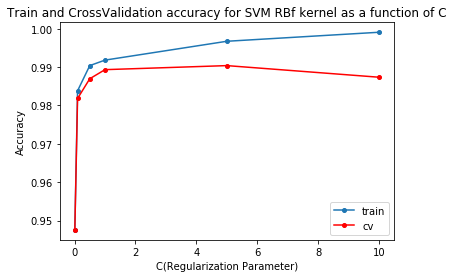

In [31]:
c=[0.01,0.1,0.5,1,5,10]
train_cv_plot_rbf(c,s1_rbf_train,s1_rbf_test)

## Sigmoid Kernel

In [32]:
model_linear = SVC(kernel='sigmoid', C=0.001)
score_1_sig = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='sigmoid', C=0.003)
score_2_sig = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='sigmoid', C=0.005)
score_3_sig = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='sigmoid', C=0.01)
score_4_sig = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='sigmoid', C=0.05)
score_5_sig = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='sigmoid', C=1)
score_6_sig = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='sigmoid', C=5)
score_7_sig = validation(model_linear, X_train, y_train)

In [33]:
score_1_sig=pd.DataFrame.from_dict(score_1_sig)
score_2_sig=pd.DataFrame.from_dict(score_2_sig)
score_3_sig=pd.DataFrame.from_dict(score_3_sig)
score_4_sig=pd.DataFrame.from_dict(score_4_sig)
score_5_sig=pd.DataFrame.from_dict(score_5_sig)
score_6_sig=pd.DataFrame.from_dict(score_6_sig)
score_7_sig=pd.DataFrame.from_dict(score_7_sig)

In [34]:
s1_sig_train=[score_1_sig[['train_score']].mean(axis=0),score_2_sig[['train_score']].mean(axis=0),
                score_3_sig[['train_score']].mean(axis=0),score_4_sig[['train_score']].mean(axis=0),
                score_5_sig[['train_score']].mean(axis=0),score_6_sig[['train_score']].mean(axis=0),score_7_sig[['train_score']].mean(axis=0)]  

s1_sig_test=[score_1_sig[['test_score']].mean(axis=0),score_2_sig[['test_score']].mean(axis=0),
                score_3_sig[['test_score']].mean(axis=0),score_4_sig[['test_score']].mean(axis=0),
                score_5_sig[['test_score']].mean(axis=0),score_6_sig[['test_score']].mean(axis=0),score_7_sig[['test_score']].mean(axis=0)]  

In [35]:
## Learning curve for Train and Test accuracy for Linear SVM function for various values of C
def train_cv_plot_sig(c,s1_linear_train,s1_linear_test):
    plt.plot(c,s1_linear_train,label='train',marker='o',markersize=4)
    plt.plot(c,s1_linear_test,label='cv',c='r',marker='o',markersize=4)
#     plot.set_xlabel("C(Regularization Parameter)", fontsize = 12)
    plt.xlabel("C(Regularization Parameter)")
    plt.ylabel("Accuracy")
#     plot1.set_title('Accuracy', fontsize = 16)
    plt.legend(loc='best')
    plt.title("Train and CrossValidation accuracy for SVM Sigmoid kernel as a function of C")

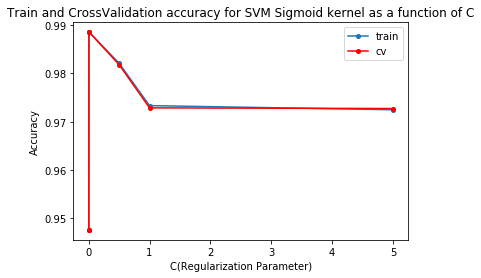

In [36]:
c=[0.001,0.003,0.005,0.01,0.5,1,5]
train_cv_plot_sig(c,s1_sig_train,s1_sig_test)

In [37]:
#### Fitting the functions on the complete training set with best parameters
## SVM Functions 
clf_linear_1 = svm.SVC(kernel='linear', C=0.1)
clf_linear_1.fit(X_train,y_train)

clf_rbf_1 = svm.SVC(kernel='rbf', C=0.1)
clf_rbf_1.fit(X_train,y_train)

clf_sigmoid_1 = svm.SVC(kernel='sigmoid', C=0.003)
clf_sigmoid_1.fit(X_train,y_train)

SVC(C=0.003, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
y_pred_linear=clf_linear_1.predict(X_test)
y_pred_rbf=clf_rbf_1.predict(X_test)
y_pred_sigmoid=clf_sigmoid_1.predict(X_test)

In [39]:
## Classification report for SVM-Linear
print(confusion_matrix(y_test,y_pred_linear))  
print(classification_report(y_test,y_pred_linear))
print(accuracy_score(y_test,y_pred_linear))

[[1804    1]
 [  16   78]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1805
           1       0.99      0.83      0.90        94

    accuracy                           0.99      1899
   macro avg       0.99      0.91      0.95      1899
weighted avg       0.99      0.99      0.99      1899

0.9910479199578726


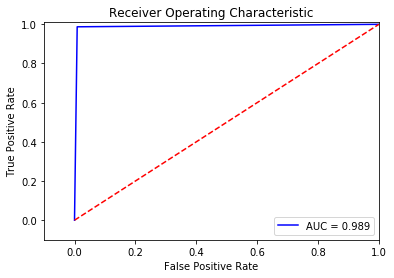

In [40]:
roc_auc(y_pred_linear,y_test)

In [41]:
## Classification report for SVM-rbf
print(confusion_matrix(y_test,y_pred_rbf))  
print(classification_report(y_test,y_pred_rbf))
print(accuracy_score(y_test,y_pred_rbf))

[[1804    1]
 [  35   59]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1805
           1       0.98      0.63      0.77        94

    accuracy                           0.98      1899
   macro avg       0.98      0.81      0.88      1899
weighted avg       0.98      0.98      0.98      1899

0.981042654028436


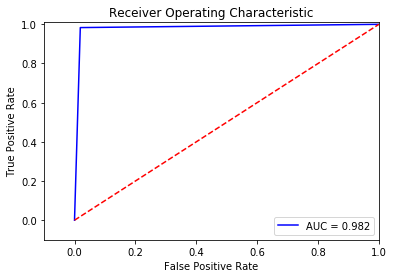

In [42]:
roc_auc(y_pred_rbf,y_test)

In [43]:
## Classification report for SVM-sigmoid
print(confusion_matrix(y_test,y_pred_sigmoid))  
print(classification_report(y_test,y_pred_sigmoid))
print(accuracy_score(y_test,y_pred_sigmoid))

[[1805    0]
 [  89    5]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1805
           1       1.00      0.05      0.10        94

    accuracy                           0.95      1899
   macro avg       0.98      0.53      0.54      1899
weighted avg       0.96      0.95      0.93      1899

0.9531332280147446


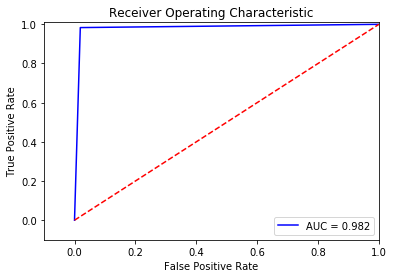

In [44]:
roc_auc(y_pred_rbf,y_test)

# Decision Tree

In [45]:
def train_using_gini(X_train, y_train, depth): 
  
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,max_depth=depth) 
  
    clf_gini.fit(X_train, y_train) #training
    return clf_gini 

In [46]:

def prediction(X_test, clf_object): 
  
    y_pred_tree = clf_object.predict(X_test)  
    return y_pred_tree

In [47]:
def accuracy(y_test, y_pred): 
      
    print("Confusion Matrix is: ",confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy Score is: ", accuracy_score(y_test,y_pred)*100) 
      
    print("Classsification Report is: ", classification_report(y_test, y_pred))

In [48]:
CC_alpha=[0.00001,0.0001,0.001,0.01,0.05,0.1,0.4]
model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.00001)
score_1_dt = validation(model_linear, X_train, y_train)
model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.0001)
score_2_dt = validation(model_linear, X_train, y_train)


model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.001)
score_3_dt = validation(model_linear, X_train, y_train)
model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.01)
score_4_dt = validation(model_linear, X_train, y_train)
model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.05)
score_5_dt = validation(model_linear, X_train, y_train)
model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.1)
score_6_dt = validation(model_linear, X_train, y_train)
model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.4)
score_7_dt = validation(model_linear, X_train, y_train)


In [49]:
score_1_dt=pd.DataFrame.from_dict(score_1_dt)
score_2_dt=pd.DataFrame.from_dict(score_2_dt)
score_3_dt=pd.DataFrame.from_dict(score_3_dt)
score_4_dt=pd.DataFrame.from_dict(score_4_dt)
score_5_dt=pd.DataFrame.from_dict(score_5_dt)
score_6_dt=pd.DataFrame.from_dict(score_6_dt)
score_7_dt=pd.DataFrame.from_dict(score_7_dt)


In [50]:
score_2_dt

,fit_time,score_time,test_score,train_score
0,0.210439,0.000000,0.978947,1.0
1,0.253323,0.000998,0.983140,1.0
2,0.215420,0.000959,0.973656,1.0
3,0.224400,0.001009,0.983140,1.0
4,0.212432,0.000000,0.988409,1.0
5,0.241353,0.000000,0.978925,1.0
6,0.208442,0.000000,0.983140,1.0
7,0.218412,0.000000,0.985248,1.0


In [51]:
s1_dt_train=[score_1_dt[['train_score']].mean(axis=0),score_2_dt[['train_score']].mean(axis=0),
                score_3_dt[['train_score']].mean(axis=0),score_4_dt[['train_score']].mean(axis=0),score_5_dt[['train_score']].mean(axis=0),
            score_6_dt[['train_score']].mean(axis=0),score_7_dt[['train_score']].mean(axis=0)]  

s1_dt_test=[score_1_dt[['test_score']].mean(axis=0),score_2_dt[['test_score']].mean(axis=0),
                score_3_dt[['test_score']].mean(axis=0),score_4_dt[['test_score']].mean(axis=0),score_5_dt[['test_score']].mean(axis=0),
           score_6_dt[['test_score']].mean(axis=0),score_7_dt[['test_score']].mean(axis=0)]  


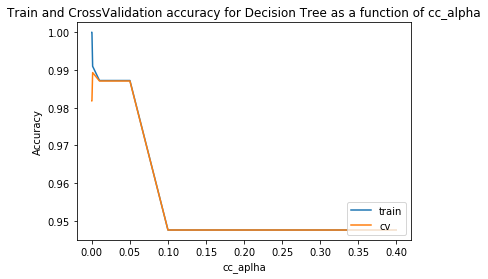

In [52]:
CC_alpha=[0.00001,0.0001,0.001,0.01,0.05,0.1,0.4]
def train_cv_plot_dt(c,s1_linear_train,s1_linear_test):
    plt.plot(c,s1_linear_train,label='train')
    plt.plot(c,s1_linear_test,label='cv')
    plt.xlabel("cc_aplha")
    plt.ylabel("Accuracy")
    plt.legend(loc='lower right')
    plt.title("Train and CrossValidation accuracy for Decision Tree as a function of cc_alpha")
train_cv_plot_dt(CC_alpha,s1_dt_train,s1_dt_test)

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
# C=[0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05]
# tree_depth=[]
# tree_acc=[]
# # for i in CC_alpha:
# #     clf_gini1 = DecisionTreeClassifier(criterion = "gini", random_state = 42,ccp_alpha=i)
# #     clf_gini_.fit(X_train, y_train)
# #     y1_pred_tree = prediction(X_test, clf_gini)
# #     print(accuracy(y_test, y_pred_tree))
# # #     print(clf_gini1.tree_.max_depth)
# #     ccp_alpha_list.append(clf_gini1)
# for i in C:
#     clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,ccp_alpha=i)
#     clf_gini.fit(X_train, y_train) 
#     y_pred_tree = prediction(X_test, clf_gini)
#     tree_acc.append(accuracy(y_test, y_pred_tree))
#     tree_depth.append(clf_gini_.tree_.max_depth)

In [55]:
# plt.plot(a,tree_depth,c='g')
# plt.xlabel('ccp_aplha')
# plt.ylabel('tree depth')
# plt.show()

In [56]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100)
clf_gini.fit(X_train, y_train) 
y_pred_tree = prediction(X_test, clf_gini)
print(accuracy(y_test, y_pred_tree))

print(clf_gini.tree_.max_depth)
# clf.gin

Confusion Matrix is:  [[1795   10]
 [  15   79]]
Accuracy Score is:  98.68351764086361
Classsification Report is:                precision    recall  f1-score   support

           0       0.99      0.99      0.99      1805
           1       0.89      0.84      0.86        94

    accuracy                           0.99      1899
   macro avg       0.94      0.92      0.93      1899
weighted avg       0.99      0.99      0.99      1899

None
22


In [57]:
print("Accuracy on training set:",clf_gini.score(X_train, y_train)*100)
print("Accuracy on test set:",clf_gini.score(X_test, y_test)*100)

Accuracy on training set: 100.0
Accuracy on test set: 98.68351764086361


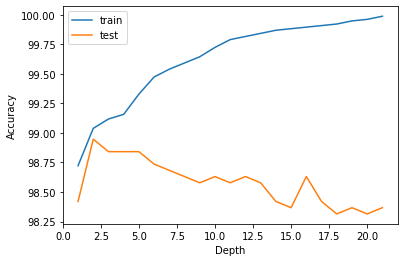

In [58]:
test_accuracy = []
train_accuracy = []
depth = []
for i in range(1,clf_gini.tree_.max_depth):
    clf_gini_1 = train_using_gini(X_train, y_train, i)
    y_pred_tree_test = prediction(X_test, clf_gini_1)
    y_pred_tree_train = prediction(X_train, clf_gini_1)
    test_accuracy.append(accuracy_score(y_test,y_pred_tree_test)*100)
    train_accuracy.append(accuracy_score(y_train,y_pred_tree_train)*100)
    depth.append(i)
    
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.plot(depth,train_accuracy, label='train')
plt.plot(depth,test_accuracy, label='test')
plt.legend(loc='best')
plt.show()

In [59]:
print("Accuracy on training set:",clf_gini.score(X_train, y_train)*100)
print("Accuracy on test set:",clf_gini.score(X_test, y_test)*100)

Accuracy on training set: 100.0
Accuracy on test set: 98.68351764086361


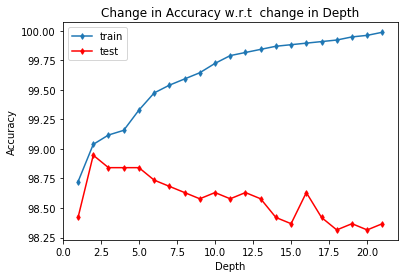

In [60]:
test_accuracy = []
train_accuracy = []
depth = []
for i in range(1,clf_gini.tree_.max_depth):
    clf_gini_1 = train_using_gini(X_train, y_train, i)
    y_pred_tree_test = prediction(X_test, clf_gini_1)
    y_pred_tree_train = prediction(X_train, clf_gini_1)
    test_accuracy.append(accuracy_score(y_test,y_pred_tree_test)*100)
    train_accuracy.append(accuracy_score(y_train,y_pred_tree_train)*100)
    depth.append(i)
    
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.plot(depth,train_accuracy, label='train',marker='d',markersize=4)
plt.plot(depth,test_accuracy, label='test',marker='d',markersize=4,color='r')
plt.title("Change in Accuracy w.r.t  change in Depth")
plt.legend(loc='best')
plt.show()

In [61]:
X_test.shape

(1899, 30)

In [62]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=8)
clf_gini.fit(X_train, y_train) 
y_pred_tree = prediction(X_test, clf_gini)
accuracy(y_test, y_pred_tree)

Confusion Matrix is:  [[1797    8]
 [  16   78]]
Accuracy Score is:  98.73617693522907
Classsification Report is:                precision    recall  f1-score   support

           0       0.99      1.00      0.99      1805
           1       0.91      0.83      0.87        94

    accuracy                           0.99      1899
   macro avg       0.95      0.91      0.93      1899
weighted avg       0.99      0.99      0.99      1899



In [63]:
CC_alpha=[0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1]
model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.0000001,max_depth=2)
score_1_dt = validation(model_linear, X_train, y_train)
model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.000001,max_depth=2)
score_2_dt = validation(model_linear, X_train, y_train)


model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.00001,max_depth=2)
score_3_dt = validation(model_linear, X_train, y_train)
model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.0001,max_depth=2)
score_4_dt = validation(model_linear, X_train, y_train)
model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.001,max_depth=2)
score_5_dt = validation(model_linear, X_train, y_train)
model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.01,max_depth=2)
score_6_dt = validation(model_linear, X_train, y_train)
model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.05,max_depth=2)
score_7_dt = validation(model_linear, X_train, y_train)


In [64]:
score_1_dt=pd.DataFrame.from_dict(score_1_dt)
score_2_dt=pd.DataFrame.from_dict(score_2_dt)
score_3_dt=pd.DataFrame.from_dict(score_3_dt)
score_4_dt=pd.DataFrame.from_dict(score_4_dt)
score_5_dt=pd.DataFrame.from_dict(score_5_dt)
score_6_dt=pd.DataFrame.from_dict(score_6_dt)
score_7_dt=pd.DataFrame.from_dict(score_7_dt)


In [65]:
score_2_dt

,fit_time,score_time,test_score,train_score
0,0.038918,0.000997,0.989474,0.990366
1,0.039830,0.000997,0.994731,0.989615
2,0.039893,0.000998,0.984194,0.990969
3,0.038926,0.000000,0.987355,0.990819
4,0.037927,0.000989,0.989463,0.990518
5,0.037899,0.000000,0.991570,0.990217
6,0.037928,0.000984,0.987355,0.990668
7,0.037968,0.000998,0.991570,0.990217


In [66]:
s1_dt_train=[score_1_dt[['train_score']].mean(axis=0),score_2_dt[['train_score']].mean(axis=0),
                score_3_dt[['train_score']].mean(axis=0),score_4_dt[['train_score']].mean(axis=0),score_5_dt[['train_score']].mean(axis=0),
            score_6_dt[['train_score']].mean(axis=0),score_7_dt[['train_score']].mean(axis=0)]  

s1_dt_test=[score_1_dt[['test_score']].mean(axis=0),score_2_dt[['test_score']].mean(axis=0),
                score_3_dt[['test_score']].mean(axis=0),score_4_dt[['test_score']].mean(axis=0),score_5_dt[['test_score']].mean(axis=0),
           score_6_dt[['test_score']].mean(axis=0),score_7_dt[['test_score']].mean(axis=0)]  


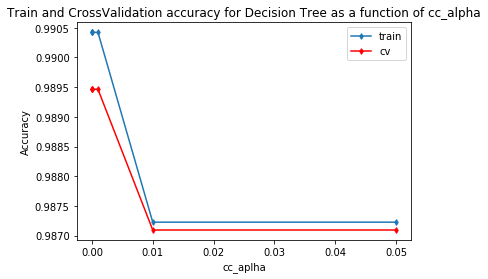

In [67]:
CC_alpha=[0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.05]
def train_cv_plot_dt(c,s1_linear_train,s1_linear_test):
    plt.plot(c,s1_linear_train,label='train',marker='d',markersize=4)
    plt.plot(c,s1_linear_test,label='cv',marker='d',markersize=4,color='r')
    plt.xlabel("cc_aplha")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.title("Train and CrossValidation accuracy for Decision Tree as a function of cc_alpha")
train_cv_plot_dt(CC_alpha,s1_dt_train,s1_dt_test)

In [68]:
from sklearn.metrics import mean_squared_error

In [69]:
C=[0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05]
tree_depth=[]
tree_acc=[]
# for i in CC_alpha:
#     clf_gini1 = DecisionTreeClassifier(criterion = "gini", random_state = 42,ccp_alpha=i)
#     clf_gini_.fit(X_train, y_train)
#     y1_pred_tree = prediction(X_test, clf_gini)
#     print(accuracy(y_test, y_pred_tree))
# #     print(clf_gini1.tree_.max_depth)
#     ccp_alpha_list.append(clf_gini1)
for i in C:
    clf_gini_ = DecisionTreeClassifier(criterion = "gini", random_state = 100,ccp_alpha=i,max_depth=2)
    clf_gini_.fit(X_train, y_train) 
    y1_pred_tree = prediction(X_test, clf_gini)
    tree_acc.append(accuracy(y_test, y_pred_tree))
    tree_depth.append(clf_gini_.tree_.max_depth)

Confusion Matrix is:  [[1797    8]
 [  16   78]]
Accuracy Score is:  98.73617693522907
Classsification Report is:                precision    recall  f1-score   support

           0       0.99      1.00      0.99      1805
           1       0.91      0.83      0.87        94

    accuracy                           0.99      1899
   macro avg       0.95      0.91      0.93      1899
weighted avg       0.99      0.99      0.99      1899

Confusion Matrix is:  [[1797    8]
 [  16   78]]
Accuracy Score is:  98.73617693522907
Classsification Report is:                precision    recall  f1-score   support

           0       0.99      1.00      0.99      1805
           1       0.91      0.83      0.87        94

    accuracy                           0.99      1899
   macro avg       0.95      0.91      0.93      1899
weighted avg       0.99      0.99      0.99      1899

Confusion Matrix is:  [[1797    8]
 [  16   78]]
Accuracy Score is:  98.73617693522907
Classsification Report is:   

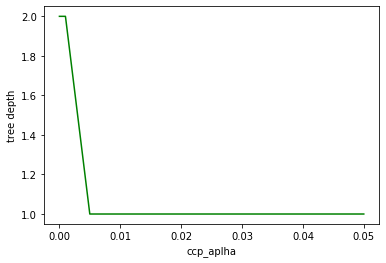

In [70]:
plt.plot(C,tree_depth,c='g')
plt.xlabel('ccp_aplha')
plt.ylabel('tree depth')
plt.show()

In [71]:
clf_gini_ = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=2,ccp_alpha=0.00001)
clf_gini_.fit(X_train, y_train) 
y1_pred_tree = prediction(X_test, clf_gini)
print(accuracy(y_test, y_pred_tree))

# print(clf_gini_.tree_.max_depth)
# clf.gin

Confusion Matrix is:  [[1797    8]
 [  16   78]]
Accuracy Score is:  98.73617693522907
Classsification Report is:                precision    recall  f1-score   support

           0       0.99      1.00      0.99      1805
           1       0.91      0.83      0.87        94

    accuracy                           0.99      1899
   macro avg       0.95      0.91      0.93      1899
weighted avg       0.99      0.99      0.99      1899

None


In [72]:
print("Accuracy on training set:",clf_gini.score(X_train, y_train)*100)
print("Accuracy on test set:",clf_gini.score(X_test, y_test)*100)

Accuracy on training set: 99.59172922428553
Accuracy on test set: 98.73617693522907


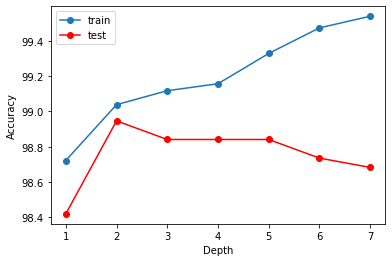

In [73]:
test_accuracy = []
train_accuracy = []
depth = []
for i in range(1,clf_gini.tree_.max_depth):
    clf_gini_1 = train_using_gini(X_train, y_train, i)
    y_pred_tree_test = prediction(X_test, clf_gini_1)
    y_pred_tree_train = prediction(X_train, clf_gini_1)
    test_accuracy.append(accuracy_score(y_test,y_pred_tree_test)*100)
    train_accuracy.append(accuracy_score(y_train,y_pred_tree_train)*100)
    depth.append(i)
    
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.plot(depth,train_accuracy, label='train',marker='o')
plt.plot(depth,test_accuracy, label='test',marker='o',color='r')
plt.legend(loc='best')
plt.show()

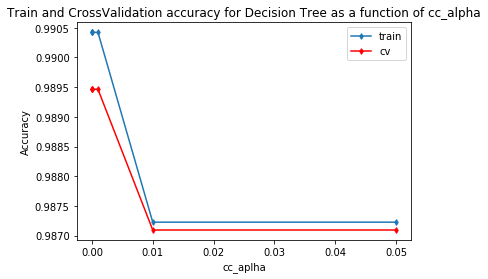

In [74]:
CC_alpha=[0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.05]
def train_cv_plot_dt(c,s1_linear_train,s1_linear_test):
    plt.plot(c,s1_linear_train,label='train',marker='d',markersize=4)
    plt.plot(c,s1_linear_test,label='cv',marker='d',markersize=4,color='r')
    plt.xlabel("cc_aplha")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.title("Train and CrossValidation accuracy for Decision Tree as a function of cc_alpha")
train_cv_plot_dt(CC_alpha,s1_dt_train,s1_dt_test)

# AdaBoost

In [75]:
regr_1 = DecisionTreeRegressor(max_depth=4)
# y_1 = regr_1.predict(X_train)


In [76]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=100, random_state=0)

clf.predict(X_test)

clf.score(X_test, y_test)

0.9899947340705635

In [78]:
def plot_error_rate(er_train, er_test):
    df_error = pd.DataFrame([er_train, er_test]).T
    df_error.columns = ['Training', 'Test']
    plot1 = df_error.plot(linewidth = 3, figsize = (8,6),
            color = ['lightblue', 'darkblue'], grid = True)
    plot1.set_xlabel('Number of iterations', fontsize = 12)
    plot1.set_xticklabels(range(0,450,50))
    plot1.set_ylabel('Error rate', fontsize = 12)
    plot1.set_title('Error rate vs number of iterations', fontsize = 16)
    plt.axhline(y=er_test[0], linewidth=1, color = 'red', ls = 'dashed')

In [79]:
ErrorRate_train=[]
ErrorRate_test=[]
x_range=range(10,200,15)
for i in x_range:
    regr_2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),
                          n_estimators=i, random_state=23)
    regr_2.fit(X_train,y_train)
    pred_train=regr_2.predict(X_train)
    pred_test=regr_2.predict(X_test)
    error_rate_train=sum(pred_train != y_train) / float(len(y_train))
    error_rate_test=sum(pred_test != y_test) / float(len(y_test))
    ErrorRate_train.append(error_rate_train)
    ErrorRate_test.append(error_rate_test)

Text(0, 0.5, 'Error rate test')

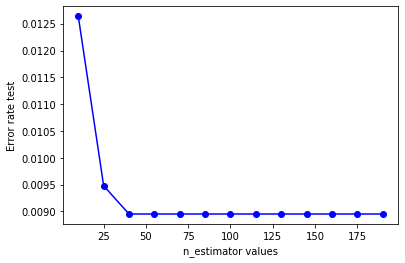

In [80]:
# plot_error_rate(ErrorRate_train, ErrorRate_test)
plt.plot(x_range,ErrorRate_test, marker="o", color='blue',animated=True)
plt.xlabel('n_estimator values')
plt.ylabel('Error rate test')
# ErrorRate_test

In [81]:
ErrorRate_train_1=[]
ErrorRate_test_1=[]
x_range_1=range(2,20,2)
for i in x_range_1:
    regr_2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=i),
                          n_estimators=120, random_state=23)
    regr_2.fit(X_train,y_train)
    pred_train=regr_2.predict(X_train)
    pred_test=regr_2.predict(X_test)
    error_rate_train=sum(pred_train != y_train) / float(len(y_train))
    error_rate_test=sum(pred_test != y_test) / float(len(y_test))
    ErrorRate_train_1.append(error_rate_train)
    ErrorRate_test_1.append(error_rate_test)

Text(0, 0.5, 'Error rate test')

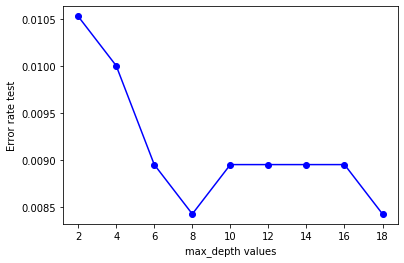

In [82]:
# plot_error_rate(ErrorRate_train, ErrorRate_test)
plt.plot(x_range_1,ErrorRate_test_1, marker="o", color='blue')
plt.xlabel('max_depth values')
plt.ylabel('Error rate test')
# ErrorRate_test

In [83]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=90, random_state=23)
ada_clf.fit(X_train,y_train)
pred_train=ada_clf.predict(X_train)
pred_test=ada_clf.predict(X_test)

#### n_estimators> 105 shoes are constant lower error rate

In [84]:
print(accuracy(y_test, pred_test))

Confusion Matrix is:  [[1804    1]
 [  17   77]]
Accuracy Score is:  99.0521327014218
Classsification Report is:                precision    recall  f1-score   support

           0       0.99      1.00      1.00      1805
           1       0.99      0.82      0.90        94

    accuracy                           0.99      1899
   macro avg       0.99      0.91      0.95      1899
weighted avg       0.99      0.99      0.99      1899

None


In [85]:
from sklearn.metrics import roc_auc_score
print('AUC score for train set:',roc_auc_score(y_train, pred_train))
print('AUC score for test set:',roc_auc_score(y_test, pred_test))

AUC score for train set: 1.0
AUC score for test set: 0.9092974597748571


# Comparison between the models

In [86]:
# y_pred_linear=clf_linear_1.predict(X_test)
# y_pred_rbf=clf_rbf_1.predict(X_test)
# y_pred_sigmoid=clf_sigmoid_1.predict(X_test)
# y1_pred_tree
# pred_test

In [87]:
accuracy=[accuracy_score(y_test,y_pred_linear),accuracy_score(y_test,y_pred_rbf),accuracy_score(y_test,y_pred_sigmoid),accuracy_score(y_test,y_pred_tree),accuracy_score(y_test,pred_test)]
Functions=['SVM_Linear','SVM_RBF','SVM_Sigmoid','Decision_tree','Adaboost']

(0.9, 1)

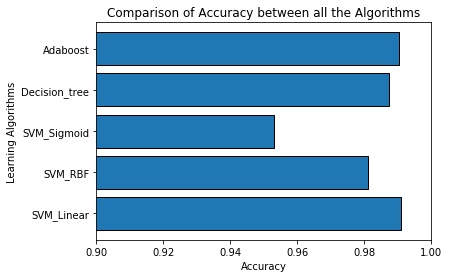

In [88]:
plt.barh(Functions,accuracy,alpha=1, edgecolor='black')
plt.xlabel("Accuracy")
plt.ylabel("Learning Algorithms")
plt.title("Comparison of Accuracy between all the Algorithms")
plt.xlim([0.9, 1])

# Learning Curve

<module 'matplotlib.pyplot' from 'C:\\Users\\14692\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

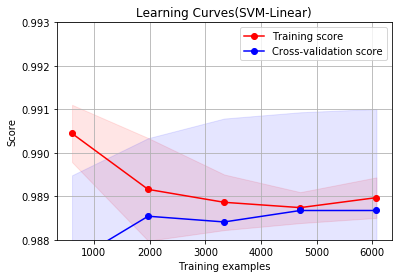

In [89]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
title = "Learning Curves(SVM-Linear)"
estimator = svm.SVC(kernel='linear', C=0.1)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.988, 0.993))

<module 'matplotlib.pyplot' from 'C:\\Users\\14692\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

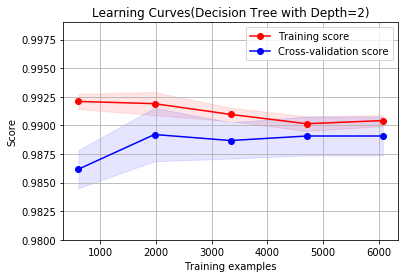

In [90]:
title = "Learning Curves(Decision Tree with Depth=2)"
estimator = DecisionTreeClassifier(criterion="gini",max_depth=2,ccp_alpha=0.00001)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.98, 0.999))

<module 'matplotlib.pyplot' from 'C:\\Users\\14692\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

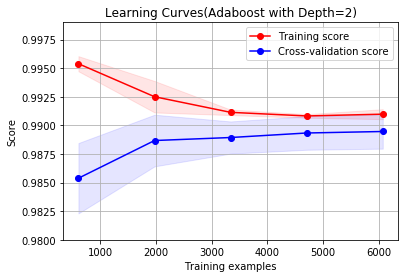

In [91]:
title = "Learning Curves(Adaboost with Depth=2)"
tree_clf = DecisionTreeClassifier(max_depth=2,ccp_alpha=0.00001)
estimator = AdaBoostClassifier(n_estimators=150, base_estimator=tree_clf, learning_rate = 0.01)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.98, 0.999))